In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [24]:
# Load the dataset
file_path = r'./TATAMOTORS.csv'  # Adjust the path
df = pd.read_csv(file_path)

# Display basic information
print(df.head())
print(df.info())


         Date Symbol Series  Prev Close   Open    High    Low   Last   Close  \
0  2000-01-03  TELCO     EQ      201.60  207.4  217.25  207.4  217.0  216.75   
1  2000-01-04  TELCO     EQ      216.75  217.0  219.00  206.0  211.9  208.20   
2  2000-01-05  TELCO     EQ      208.20  194.0  217.80  194.0  213.1  213.25   
3  2000-01-06  TELCO     EQ      213.25  215.0  229.90  215.0  222.0  222.10   
4  2000-01-07  TELCO     EQ      222.10  224.0  239.90  223.1  239.9  239.90   

     VWAP   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  214.28   676126  1.448775e+13     NaN                 NaN          NaN  
1  209.50   679215  1.422962e+13     NaN                 NaN          NaN  
2  210.33  1120951  2.357684e+13     NaN                 NaN          NaN  
3  225.29  1968998  4.435932e+13     NaN                 NaN          NaN  
4  236.32  2199431  5.197636e+13     NaN                 NaN          NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries,

In [18]:
# Check for null values
print(df.isnull().sum())

# Drop rows with missing values if necessary
df = df.dropna()


Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64


In [19]:
# Drop irrelevant columns
df = df.drop(['Symbol', 'Series', 'VWAP', 'Trades', 'Deliverable Volume', '%Deliverble'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Verify changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2456 entries, 2850 to 5305
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2456 non-null   object 
 1   Prev Close  2456 non-null   float64
 2   Open        2456 non-null   float64
 3   High        2456 non-null   float64
 4   Low         2456 non-null   float64
 5   Last        2456 non-null   float64
 6   Close       2456 non-null   float64
 7   Volume      2456 non-null   int64  
 8   Turnover    2456 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 191.9+ KB
None


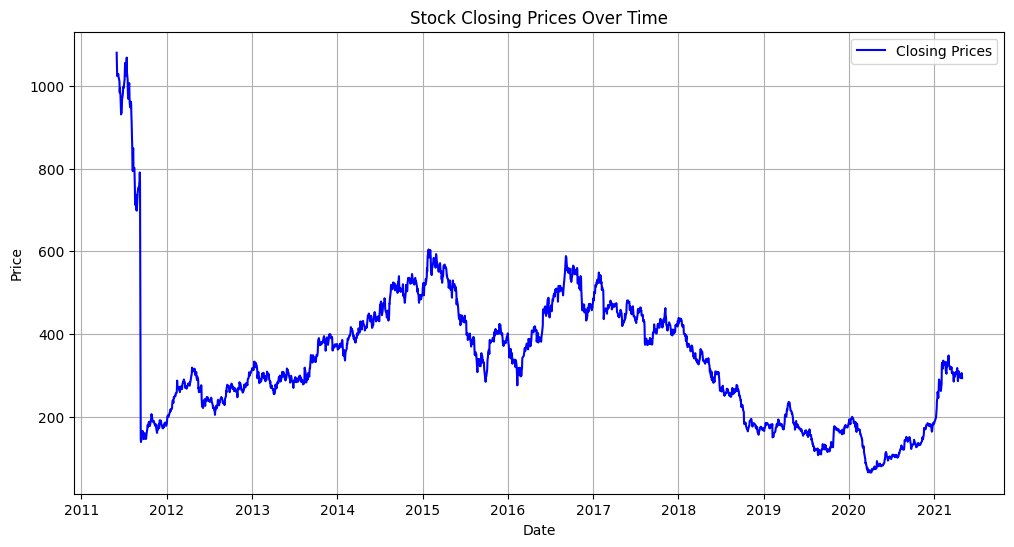

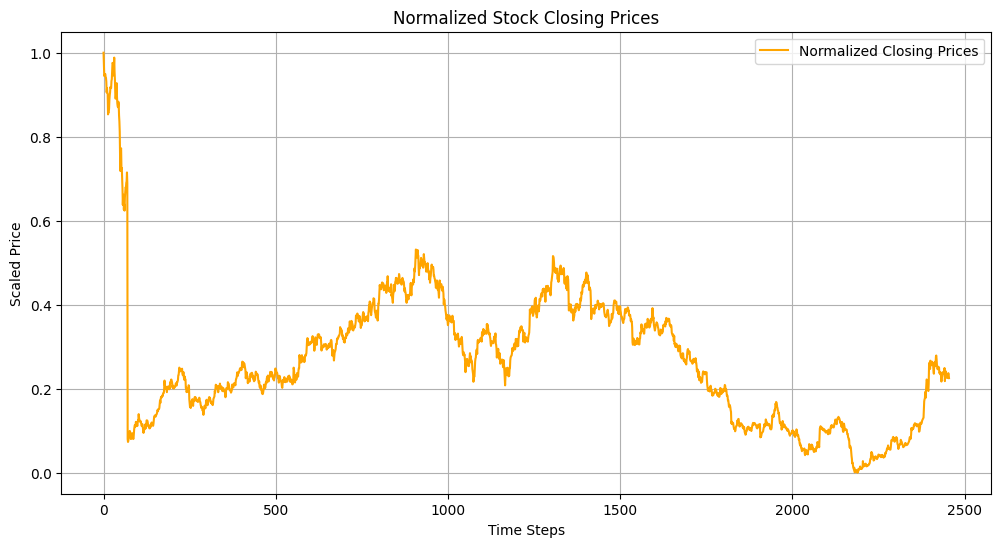

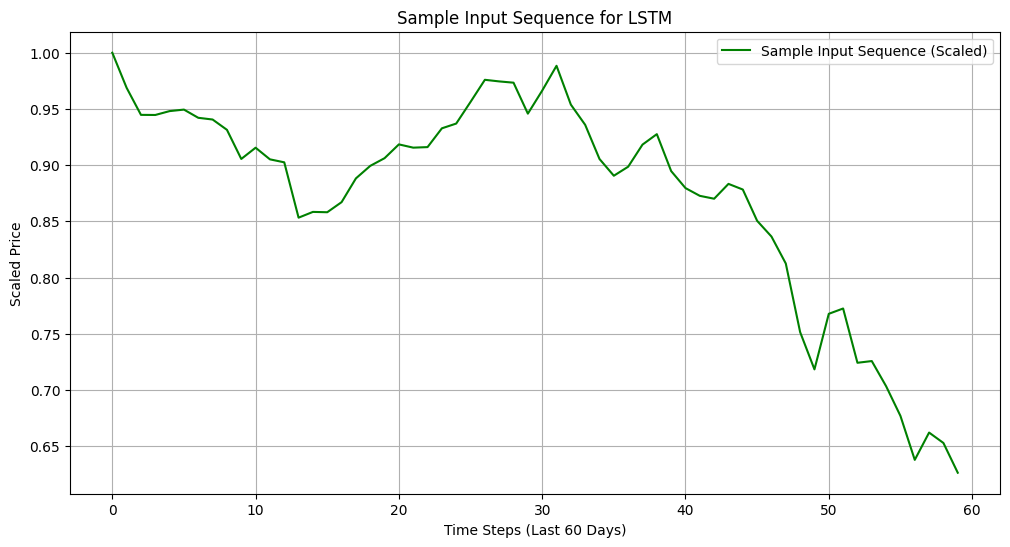

X shape: (2396, 60, 1), y shape: (2396,)


In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Plot the original closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="Closing Prices", color="blue")
plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Use only the 'Close' price for prediction
data = df[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Plot normalized data
plt.figure(figsize=(12, 6))
plt.plot(data_scaled, label="Normalized Closing Prices", color="orange")
plt.title("Normalized Stock Closing Prices")
plt.xlabel("Time Steps")
plt.ylabel("Scaled Price")
plt.legend()
plt.grid(True)
plt.show()

# Create feature (X) and target (y) datasets
X, y = [], []
look_back = 60  # Use the last 60 days to predict the next day
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i-look_back:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Plot a sample input sequence
plt.figure(figsize=(12, 6))
plt.plot(range(look_back), X[0].flatten(), label="Sample Input Sequence (Scaled)", color="green")
plt.title("Sample Input Sequence for LSTM")
plt.xlabel("Time Steps (Last 60 Days)")
plt.ylabel("Scaled Price")
plt.legend()
plt.grid(True)
plt.show()

# Reshape X for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Display final shapes of X and y
print(f"X shape: {X.shape}, y shape: {y.shape}")


In [21]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=32, epochs=200)

Epoch 1/200


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0135
Epoch 2/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.0846e-04
Epoch 3/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 8.5417e-04
Epoch 4/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 7.5947e-04
Epoch 5/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.6042e-04
Epoch 6/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.8296e-04
Epoch 7/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.5082e-04
Epoch 8/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 6.8015e-04
Epoch 9/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.8909e-04
Epoch 10/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.8206e-04
Epoch 11/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.0105e-04
Epoch 12/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 7.8193e-04
Epoch 13/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.1549e-04
Epoch 14/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.5974e-04
Epoch 15/200
75/7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


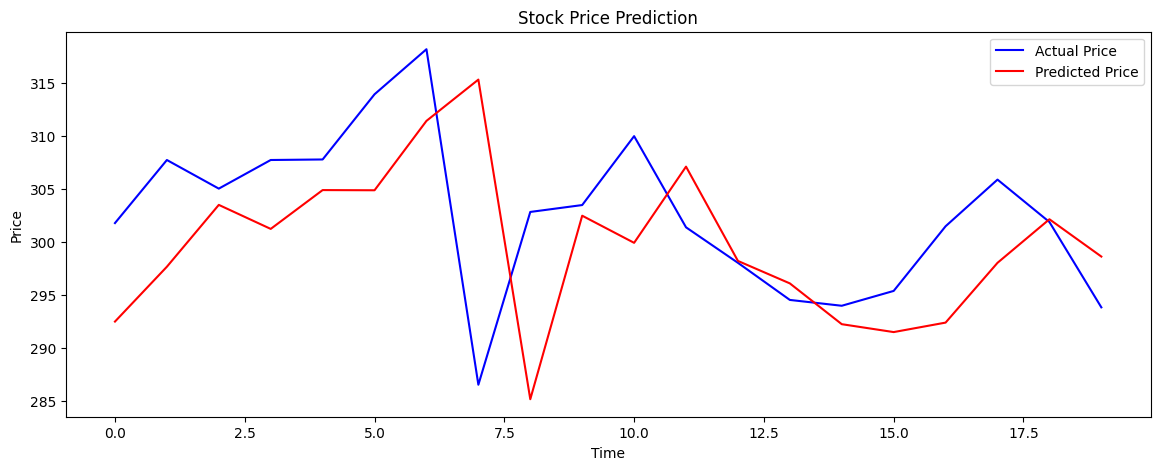

In [22]:
# Create test data
test_data = data_scaled[-(look_back + 20):]
X_test, y_test = [], []
for i in range(look_back, len(test_data)):
    X_test.append(test_data[i-look_back:i, 0])
    y_test.append(test_data[i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)

# Reshape test data
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual data
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs. predicted
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:

# Multi-step prediction
future_days = 10  # Number of days to predict
future_prices = []

# Start with the last available sequence
current_sequence = data_scaled[-look_back:].reshape(1, look_back, 1)

for _ in range(future_days):
    # Predict the next price
    next_price_scaled = model.predict(current_sequence)
    next_price = scaler.inverse_transform(next_price_scaled)[0][0]
    future_prices.append(next_price)

    # Update the sequence with the new predicted price
    next_sequence_scaled = np.append(current_sequence[0, 1:], next_price_scaled)
    current_sequence = next_sequence_scaled.reshape(1, look_back, 1)

print(f"Future Predicted Prices: {future_prices}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Future Predicted Prices: [np.float32(291.7028), np.float32(289.8108), np.float32(287.44794), np.float32(284.88828), np.float32(282.16156), np.float32(279.3014), np.float32(276.33453), np.float32(273.28165), np.float32(270.15875), np.float32(266.9789)]
